## originally used kaggle dataset to get a feel for the basic features, but scraped full dataset as of 2019-01-20 using R package crypto, and - after flailing around in Python for ~4-5 hours on this one task - switched over to dplyr to generate (in a half hour) a daily bitcoin price reference column to allow for price ratio generation - dplyr, you still complete me

https://www.kaggle.com/jessevent/all-crypto-currencies

"Observations: 942,000 

Variables: 13 

Crypto Tokens: 2,071

All historic open, high, low, close values for all cryptocurrencies.

Fixed duplicate coins sharing symbol by introducing coin slug

<b/>Data current as of 21 May 2018</b>

Added two new variables, close_ratio and spread

Close ratio is the daily close rate, min-maxed with the high and low values for the day. 

Close Ratio = (Close-Low)/(High-Low)

Spread is the $USD difference between the high and low values for the day.

## Headers remain the same for the full scraped dataset, except bitcoin_open, which is the previously-mentioned reference column

Market refers to market cap, which for CoinMarketCap is (circulation coin #)*(price per coin)

In [2]:
#RUN FOR ALL PROCESSES#

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#narrow down until you're in the folder that you want
#not necessary in Jupyter, but good practice:
os.listdir('/home/cynthiaorourke/Documents/Data')
#in Linux: [locate Downloads], then copy/paste path without modifying slashes
#there's our working directory list:

['S_and_P_stocks',
 'wine_data.csv',
 'WeekEight2015_18.csv',
 'Crunchbase_Startup_Investment_Data.csv',
 'coins23.csv',
 'headsupwinedata.zip',
 'coins.csv',
 'monthly_coins.csv',
 'weekly_coins.csv',
 'individual_stocks_5yr.zip',
 'crypto-markets (1).csv',
 'cleaned_coins.csv',
 'Final2015_18.csv',
 'full_coins.csv']

In [26]:
rawcoins = pd.read_csv('/home/cynthiaorourke/Documents/Data/full_coins.csv', header = 0)
list(rawcoins)
print('looks like we gained an extra index row in dplyr')
print(rawcoins.iloc[0:10,:])
# 'slug' is the name
# 'symbol' is the ticker
# 'name' is the name (different from slug how?)
# 'date' is the day for open/high/low values
# 'ranknow' is I'm guessing the rank in marketcap on that day
# 'open' is the opening (12 am?) price relative to day, but can't be midnight to midnight as open doesnt match...
# 'high' is the high price within that day
# 'low' is the low price within that day
# 'close'... previous day's close
# 'volume' is...
# 'market' is...
# 'close_ratio'...
# 'spread'...

looks like we gained an extra index row in dplyr
   Unnamed: 0     slug symbol     name        date  ranknow    open    high  \
0           1  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98   
1           2  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49   
2           3  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93   
3           4  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89   
4           5  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   
5           6  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   
6           7  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   
7           8  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80   
8           9  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66   
9          10  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   

      low   close  volume      market  close_ratio  spread  bitcoin_open  
0  132

In [27]:
rawcoins.drop(rawcoins.columns[0], axis=1, inplace=True)
print('now without that extra index')
print(rawcoins.iloc[0:10,:])

now without that extra index
      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume      market  close_ratio  spread  bitcoin_open  
0  134.21       0  1488566728     0.543814    3.88        135.30  
1  144.54  

In [4]:
print(rawcoins['name'].value_counts()) #oldest coins have 2042 days' of data, youngest have 2
print('number of unique values per column in dataset:')
print(rawcoins.nunique(dropna=True)) #there are ~2000 slugs/symbols/tickers, and slugs=names,... 
#...but there are 66 fewer tickers than slugs/names
rawcoins.dtypes #date is an object; all other numeric values are int64 or float64

Litecoin                 2093
Namecoin                 2093
Bitcoin                  2093
Novacoin                 2092
Peercoin                 2092
Feathercoin              2088
Terracoin                2079
BitBar                   2066
WorldCoin                2055
Digitalcoin              2051
GoldCoin                 2039
Primecoin                2019
Anoncoin                 2000
XRP                      1995
Ixcoin                   1991
Bullion                  1991
Megacoin                 1990
Freicoin                 1982
Infinitecoin             1982
Quark                    1971
Phoenixcoin              1959
Zetacoin                 1955
Fastcoin                 1928
Argentum                 1892
TagCoin                  1891
FLO                      1880
CasinoCoin               1880
Nxt                      1873
Deutsche eMark           1863
Dogecoin                 1862
                         ... 
Ultiledger                 13
Aencoin                    12
Content Va

slug             object
symbol           object
name             object
date             object
ranknow           int64
open            float64
high            float64
low             float64
close           float64
volume            int64
market            int64
close_ratio     float64
spread          float64
bitcoin_open    float64
dtype: object

In [5]:
#let's create a column that is the ratio of each coin's price to the bitcoin price
rawcoins['coin_to_bitcoin']=(1/rawcoins['bitcoin_open'])*(rawcoins['open'])

In [6]:
#did that work?
print(rawcoins.iloc[5000:5010,:])
#YES IT DID - dplyr I love you

          slug symbol      name        date  ranknow    open    high     low  \
5000  ethereum    ETH  Ethereum  2018-02-04        3  964.67  969.03  805.06   
5001  ethereum    ETH  Ethereum  2018-02-05        3  834.96  856.65  644.60   
5002  ethereum    ETH  Ethereum  2018-02-06        3  707.74  796.44  574.42   
5003  ethereum    ETH  Ethereum  2018-02-07        3  790.43  851.20  723.43   
5004  ethereum    ETH  Ethereum  2018-02-08        3  755.84  845.09  755.84   
5005  ethereum    ETH  Ethereum  2018-02-09        3  818.48  884.00  788.83   
5006  ethereum    ETH  Ethereum  2018-02-10        3  882.47  917.40  825.58   
5007  ethereum    ETH  Ethereum  2018-02-11        3  859.29  859.29  788.22   
5008  ethereum    ETH  Ethereum  2018-02-12        3  817.51  875.94  817.51   
5009  ethereum    ETH  Ethereum  2018-02-13        3  869.29  870.71  828.84   

       close      volume       market  close_ratio  spread  bitcoin_open  \
5000  834.68  2997090048  81310521832     0

In [7]:
# updated so that now we're looking at the slope of the bitcoin ratio value change for each coin
## rawcoins.groupby(['name']).groups.keys()
## len(rawcoins.groupby(['name']).groups.keys())
## rawcoins.groupby('name')['date'].count() #extracts number of entries per coin
rawcoins['open_to_open']=rawcoins['coin_to_bitcoin']-rawcoins['coin_to_bitcoin'].shift(1) #needs to be grouped
# open_to_open passes hand-calculation spot check - seems to be doing what it's meant to
# manually delete border entries? ideally replace them with zeroes
print(rawcoins.iloc[2040:2050,:])

         slug symbol     name        date  ranknow     open     high      low  \
2040  bitcoin    BTC  Bitcoin  2018-11-28        1  3822.47  4385.90  3822.47   
2041  bitcoin    BTC  Bitcoin  2018-11-29        1  4269.00  4413.02  4145.77   
2042  bitcoin    BTC  Bitcoin  2018-11-30        1  4289.09  4322.98  3942.82   
2043  bitcoin    BTC  Bitcoin  2018-12-01        1  4024.46  4309.38  3969.71   
2044  bitcoin    BTC  Bitcoin  2018-12-02        1  4200.73  4301.52  4110.98   
2045  bitcoin    BTC  Bitcoin  2018-12-03        1  4147.32  4155.98  3840.45   
2046  bitcoin    BTC  Bitcoin  2018-12-04        1  3886.29  4075.63  3832.75   
2047  bitcoin    BTC  Bitcoin  2018-12-05        1  3958.89  3969.54  3753.99   
2048  bitcoin    BTC  Bitcoin  2018-12-06        1  3754.07  3874.97  3521.10   
2049  bitcoin    BTC  Bitcoin  2018-12-07        1  3512.59  3512.59  3280.23   

        close      volume       market  close_ratio  spread  bitcoin_open  \
2040  4257.42  7280280000  7407

In [8]:
#are there border issues? nothing too crazy, though the NaNs may need a revisit
print(rawcoins.shape)
print(rawcoins.iloc[2090:2095,[2,15]]) #NaN at the start of each non-BTC symbol
print((rawcoins['name'].values == 'TWIST').sum())
print(rawcoins.iloc[-155:,[2,14,15]]) #NaN at end of each symbol

(1026980, 16)
         name  open_to_open
2090  Bitcoin  0.000000e+00
2091  Bitcoin -1.110223e-16
2092  Bitcoin  1.110223e-16
2093      XRP -9.999440e-01
2094      XRP -8.100092e-08
154
          name  coin_to_bitcoin  open_to_open
1026825   MIRQ              NaN           NaN
1026826  TWIST     4.859619e-07           NaN
1026827  TWIST     4.981694e-07  1.220749e-08
1026828  TWIST     4.699171e-07 -2.825223e-08
1026829  TWIST     5.689541e-07  9.903697e-08
1026830  TWIST     5.990976e-07  3.014352e-08
1026831  TWIST     4.485152e-07 -1.505824e-07
1026832  TWIST     5.205311e-07  7.201583e-08
1026833  TWIST     5.106694e-07 -9.861703e-09
1026834  TWIST     4.395537e-07 -7.111563e-08
1026835  TWIST     4.393863e-07 -1.674726e-10
1026836  TWIST     4.799993e-07  4.061305e-08
1026837  TWIST     4.612868e-07 -1.871256e-08
1026838  TWIST     4.244259e-07 -3.686083e-08
1026839  TWIST     4.300668e-07  5.640922e-09
1026840  TWIST     4.196988e-07 -1.036807e-08
1026841  TWIST     3.802836e-07 

In [9]:
#THIS CELL TAKES A WHILE TO RUN
#could replace all NaNs with zeroes by column command, but would first want to make sure that...
#... all NaNs represent borders; there should be 2*(coin#)-1, because bitcoin doesn't have an initial NaN
# there are 2116 unique slugs/names and 2050 unique tickers/symbols here
#should therefore be 4231 NaNs in the open_to_open column
print(rawcoins['open_to_open'].isna().sum()) #NaNs at 2798 before running the for loop
#there's 2798, so we... don't have enough NaNs?
#I bet that NaNs are only occuring where the previous coin had a coin_to_bitcoin value of NaN
#probably otherwise basing price change off of last entry of other coin, which is not desired
#this for loop should also catch and replace those values with zero...
#...but keep an eye out for coin birth day oddities

for i in rawcoins.index:
    if rawcoins.iloc[i,0]!=rawcoins.iloc[i-1,0]:
        rawcoins.loc[rawcoins.index==i,'open_to_open'] = 0

print(rawcoins['open_to_open'].isna().sum()) #drops NaNs to 1399

2798
1399


In [12]:
#for loop has worked to replace day-one open-to-open with zero, as demonstrated by:
print(rawcoins.iloc[2090:2095,[2,15]]) #NaN at the start of each non-BTC symbol
print((rawcoins['name'].values == 'TWIST').sum())
print(rawcoins.iloc[-155:-145,[2,14,15]]) #NaN at end of each symbol

         name  open_to_open
2090  Bitcoin  0.000000e+00
2091  Bitcoin -1.110223e-16
2092  Bitcoin  1.110223e-16
2093      XRP  0.000000e+00
2094      XRP -8.100092e-08
154
          name  coin_to_bitcoin  open_to_open
1026825   MIRQ              NaN           NaN
1026826  TWIST     4.859619e-07  0.000000e+00
1026827  TWIST     4.981694e-07  1.220749e-08
1026828  TWIST     4.699171e-07 -2.825223e-08
1026829  TWIST     5.689541e-07  9.903697e-08
1026830  TWIST     5.990976e-07  3.014352e-08
1026831  TWIST     4.485152e-07 -1.505824e-07
1026832  TWIST     5.205311e-07  7.201583e-08
1026833  TWIST     5.106694e-07 -9.861703e-09
1026834  TWIST     4.395537e-07 -7.111563e-08


SaluS


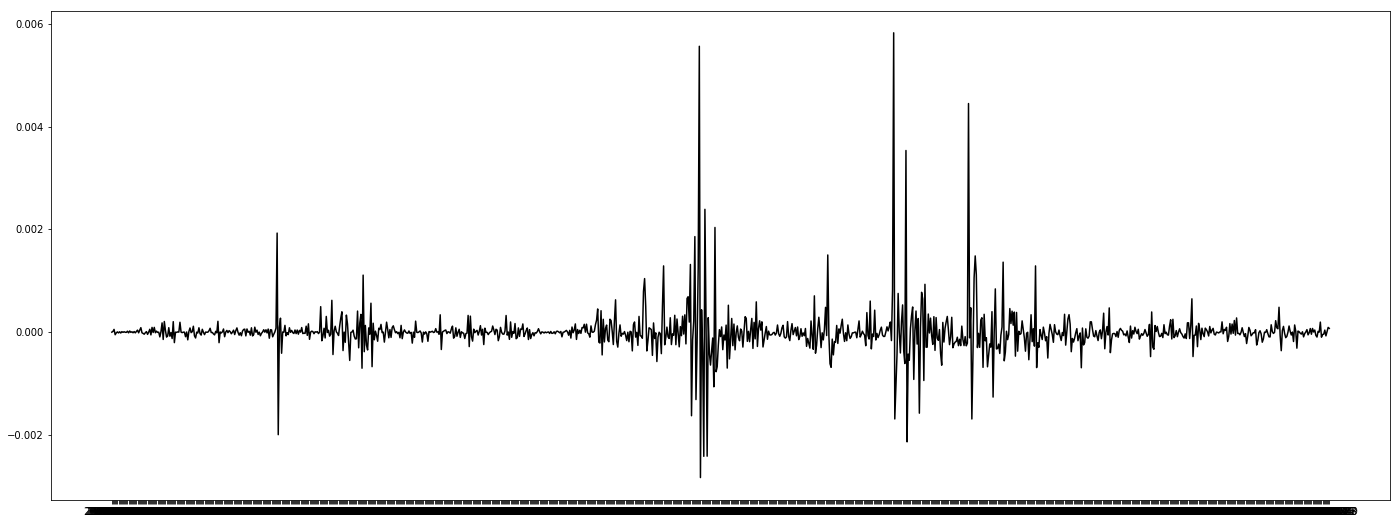

144459     409.75
144460     382.43
144461     388.10
144462     402.32
144463     392.00
144464     392.44
144465     395.15
144466     380.11
144467     378.86
144468     378.29
144469     369.35
144470     372.92
144471     374.65
144472     370.17
144473     388.90
144474     386.59
144475     376.51
144476     376.76
144477     373.42
144478     376.15
144479     382.11
144480     379.69
144481     384.64
144482     392.93
144483     407.57
144484     401.43
144485     407.66
144486     416.57
144487     422.73
144488     421.60
           ...   
145520    4133.70
145521    3898.08
145522    4020.99
145523    4000.33
145524    4081.03
145525    3819.67
145526    3854.69
145527    3653.13
145528    3932.49
145529    3822.38
145530    3866.84
145531    3746.71
145532    3849.22
145533    3931.05
145534    3832.04
145535    3851.97
145536    3836.52
145537    4078.59
145538    4028.47
145539    4031.55
145540    4034.41
145541    3674.02
145542    3686.97
145543    3658.87
145544    

In [13]:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

# a=np.random.choice(rawcoins['name']) #set coin name to random
a = 'SaluS' #specify coin name
print(a)
x=rawcoins['date'][(rawcoins['name'] == a)]
y1=rawcoins['open_to_open'][(rawcoins['name'] == a)]
c1='black'
# y2=rawcoins['open'][(rawcoins['name'] == a)]
# c2='blue'
# y3=rawcoins['high'][(rawcoins['name'] == a)]
# c3='red'
# y4=rawcoins['low'][(rawcoins['name'] == a)]
# c4='grey'
# y5=rawcoins['close'][(rawcoins['name'] == a)]
# c5='orange'
# y6=(rawcoins['ranknow'][(rawcoins['name'] == a)]/1000)
# c6='teal'
# y7=rawcoins['volume'][(rawcoins['name'] == a)]
# c7='lime'
# y8=rawcoins['market'][(rawcoins['name'] == a)]
# c8='indigo'
# y9=rawcoins['close_ratio'][(rawcoins['name'] == a)] #not finding close ratio informative & it's adding a lot of noise
# c9='pink'
# y10=rawcoins['spread'][(rawcoins['name'] == a)] 
# c10 = 'black'
plt.plot(x, y1, c=c1)#DRG is in black
# plt.plot(x, y2, c=c2)
# plt.plot(x, y3, c=c3)
# plt.plot(x, y4, c=c4)
# plt.plot(x, y5, c=c5)
# plt.plot(x, y6, c=c6)
# plt.plot(x, y7, c=c7)
# plt.plot(x, y8, c=c8)
# plt.plot(x, y9, c=c9)
# plt.plot(x, y10, c=c10)
plt.show()

print(rawcoins.iloc[:,13][(rawcoins['name'] == a)])

#looks like spread is somewhat correlated with DGR, but far from perfectly...
#... and the level of spread:DGR correlation varies substantially from coin to coin
#https://cryptocurrencyhub.io/some-cryptocurrency-exchange-definitions-price-spread-limit-market-orders-and-candlesticks-25e232042fc1
#"The Price Spread is the difference between the highest buy order and lowest sell order in the Orderbook. 
#Typically, the more liquid a market is the lower the Price Spread is. 
#Liquidity is the degree at which something can be bought or sold on a market quickly without... 
#... effecting the item’s price. So if there is a low degree of liquidity and somebody wants to buy,...
#...say NEO, their purchase of NEO will likely raise it's[sic] price because the Price Spread would...
#...be bigger in an non-liquid market, i.e. 1% vs a 5% difference. 
#The closer the Price Spread, the less the price is effected[sic] during the buys/sells."

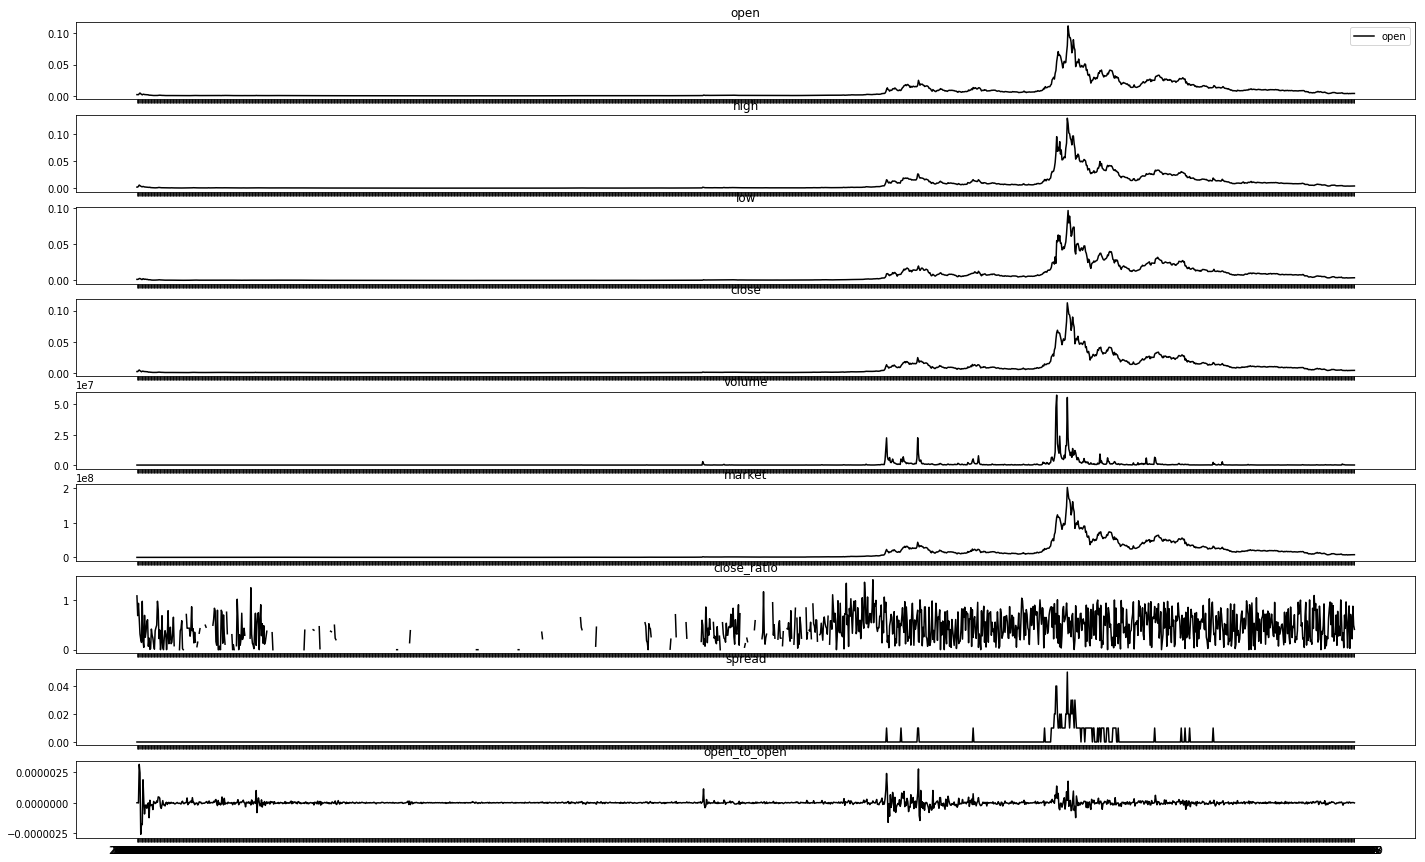

In [15]:
#setting this up as subplots so that I can visualize each metric against its own y axis
width = 24
length = 15
plt.rcParams['figure.figsize'] = (width, length)

a=np.random.choice(rawcoins['name']) #manipulate coin2 name here

x=rawcoins['date'][(rawcoins['name'] == a)]
y1=rawcoins['open'][(rawcoins['name'] == a)]
c1='black'

y2=rawcoins['high'][(rawcoins['name'] == a)]

y3=rawcoins['low'][(rawcoins['name'] == a)]

y4=rawcoins['close'][(rawcoins['name'] == a)]

# y5=rawcoins['ranknow'][(rawcoins['name'] == a)]

y6=rawcoins['volume'][(rawcoins['name'] == a)]

y7=rawcoins['market'][(rawcoins['name'] == a)]

y8=rawcoins['close_ratio'][(rawcoins['name'] == a)]

y9=rawcoins['spread'][(rawcoins['name'] == a)]

y10=rawcoins['open_to_open'][(rawcoins['name'] == a)]

f, axarr = plt.subplots(9, sharex=True)
axarr[0].plot(x, y1, c=c1)
axarr[0].legend(loc="upper right")
axarr[0].set_title('open') #fairly redundant with other price metrics (op/hi/lw/cls), except odd one-day spikes
axarr[1].plot(x, y2, c=c1) 
axarr[1].set_title('high') #fairly redundant with other price metrics (op/hi/lw/cls), except odd one-day spikes
axarr[2].plot(x, y3, c=c1)
axarr[2].set_title('low') #fairly redundant with other price metrics (op/hi/lw/cls), except odd one-day spikes
axarr[3].plot(x, y4, c=c1)
axarr[3].set_title('close') #fairly redundant with other price metrics (op/hi/lw/cls), except odd one-day spikes
# axarr[4].plot(x, y5, c=c1)
# axarr[4].set_title('ranknow') #not very information - for most coins, little shift over lifespan
axarr[4].plot(x, y6, c=c1)
axarr[4].set_title('volume') 
axarr[5].plot(x, y7, c=c1)
axarr[5].set_title('market') 
axarr[6].plot(x, y8, c=c1)
axarr[6].set_title('close_ratio') 
axarr[7].plot(x, y9, c=c1)
axarr[7].set_title('spread') 
axarr[8].plot(x, y10, c=c1)
axarr[8].set_title('open_to_open') 

#a lot of these values are closely correlated EXCEPT in early days
#take care to retain young coin patterns - those are a major goal
#a lot of these are extremely correlated (though none with open_to_open bitcoin ratio)
#however, correlation patterns change over time, so worth retaining them as potential features in ARIMA/RNN/etc.

#for purposes of looked at between-coin correlations, can probably weed down to:
#open (open/high/low/close/market all correlate strongly within coin)
#volume
#close ratio
#spread
#open_to_open

plt.show()

## Ok, let's do this for a few coins at a time, after cleaning up the plot commands
## Timelines are not aligned - cannot compare directly between plots, except to say that there are definitely hot periods of upward and downward momentum

In [17]:
rawcoins['date_as_date'] =  pd.to_datetime(rawcoins['date'], format='%Y-%m-%d')
print(rawcoins.iloc[0:10,16])

0   2013-04-28
1   2013-04-29
2   2013-04-30
3   2013-05-01
4   2013-05-02
5   2013-05-03
6   2013-05-04
7   2013-05-05
8   2013-05-06
9   2013-05-07
Name: date_as_date, dtype: datetime64[ns]


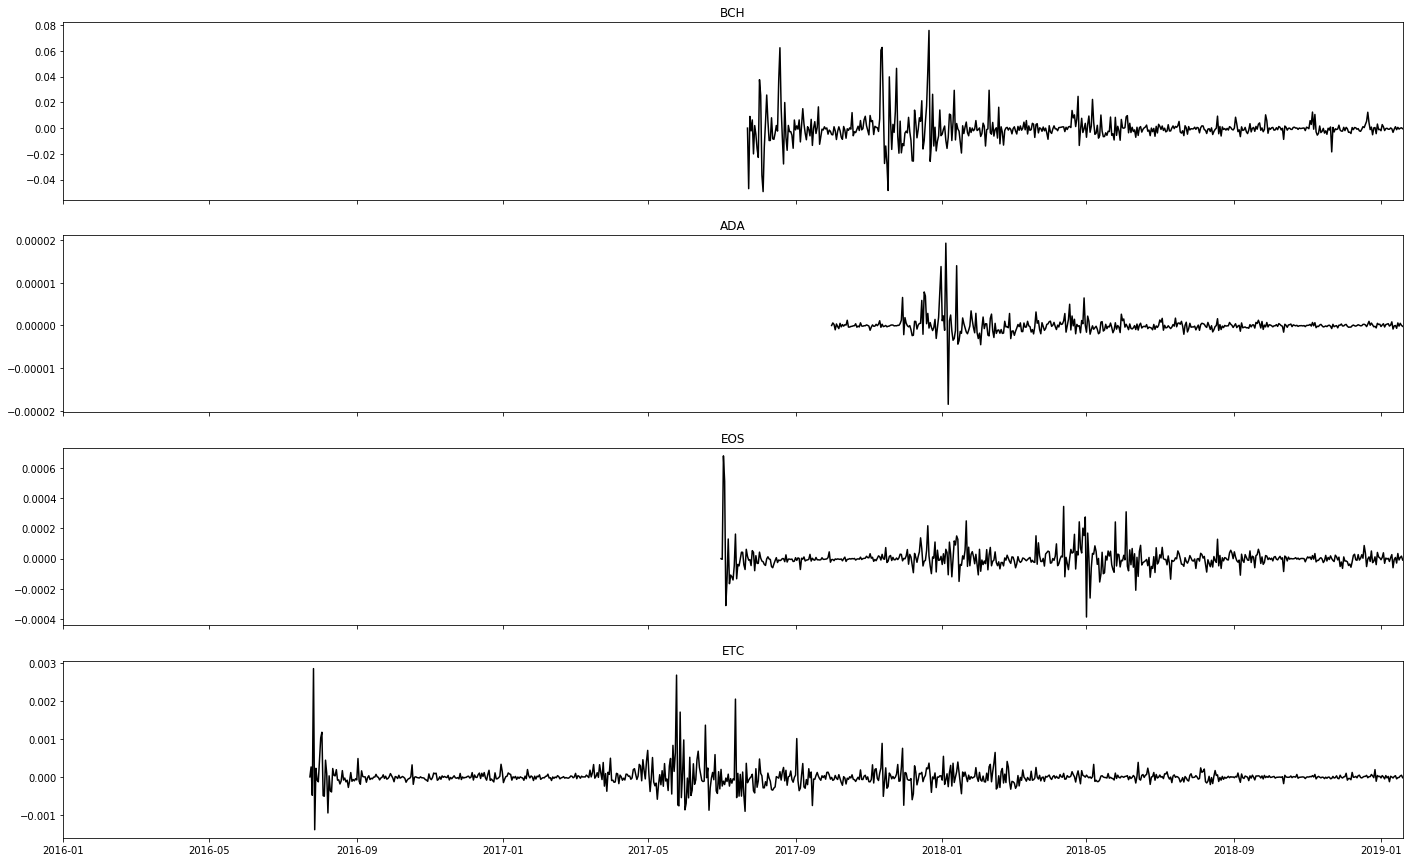

In [23]:
#use subplots so that smaller-value coin's value is not hidden:

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=rawcoins['date_as_date'][(rawcoins['symbol'] == a)]
y1=rawcoins['open_to_open'][(rawcoins['symbol'] == a)]

x2=rawcoins['date_as_date'][(rawcoins['symbol'] == b)]
y2=rawcoins['open_to_open'][(rawcoins['symbol'] == b)]

x3=rawcoins['date_as_date'][(rawcoins['symbol'] == c)]
y3=rawcoins['open_to_open'][(rawcoins['symbol'] == c)]

x4=rawcoins['date_as_date'][(rawcoins['symbol'] == d)]
y4=rawcoins['open_to_open'][(rawcoins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
##plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#that was for slope of daily change of bitcoin ratio (DRG), but what about the raw ratio? see next cell

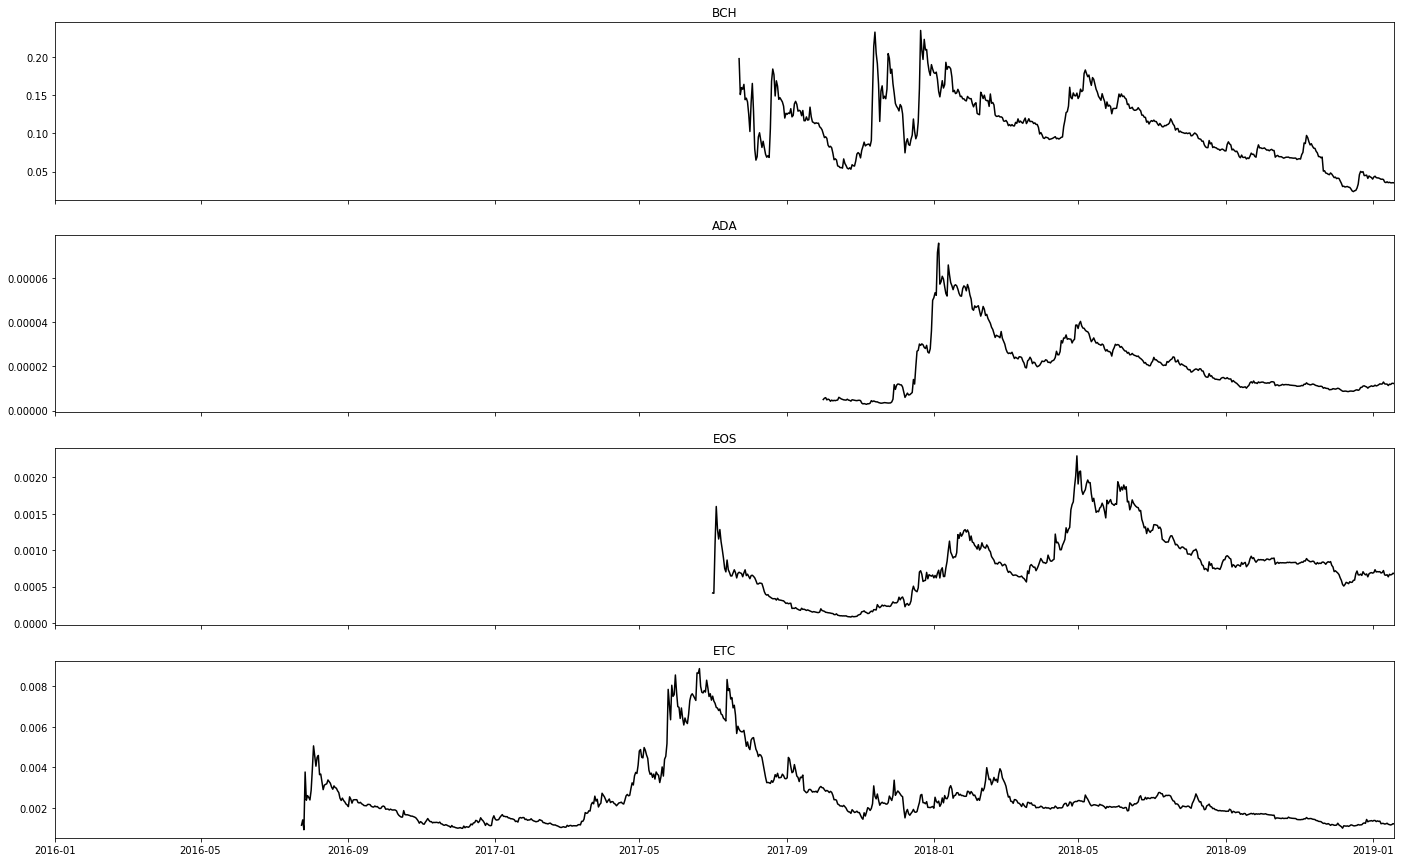

In [22]:
#use subplots so that smaller-value coin's value is not hidden:

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=rawcoins['date_as_date'][(rawcoins['symbol'] == a)]
y1=rawcoins['coin_to_bitcoin'][(rawcoins['symbol'] == a)]

x2=rawcoins['date_as_date'][(rawcoins['symbol'] == b)]
y2=rawcoins['coin_to_bitcoin'][(rawcoins['symbol'] == b)]

x3=rawcoins['date_as_date'][(rawcoins['symbol'] == c)]
y3=rawcoins['coin_to_bitcoin'][(rawcoins['symbol'] == c)]

x4=rawcoins['date_as_date'][(rawcoins['symbol'] == d)]
y4=rawcoins['coin_to_bitcoin'][(rawcoins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
##plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#that was for slope of daily change of bitcoin ratio (DRG), but what about the raw ratio? see next cell

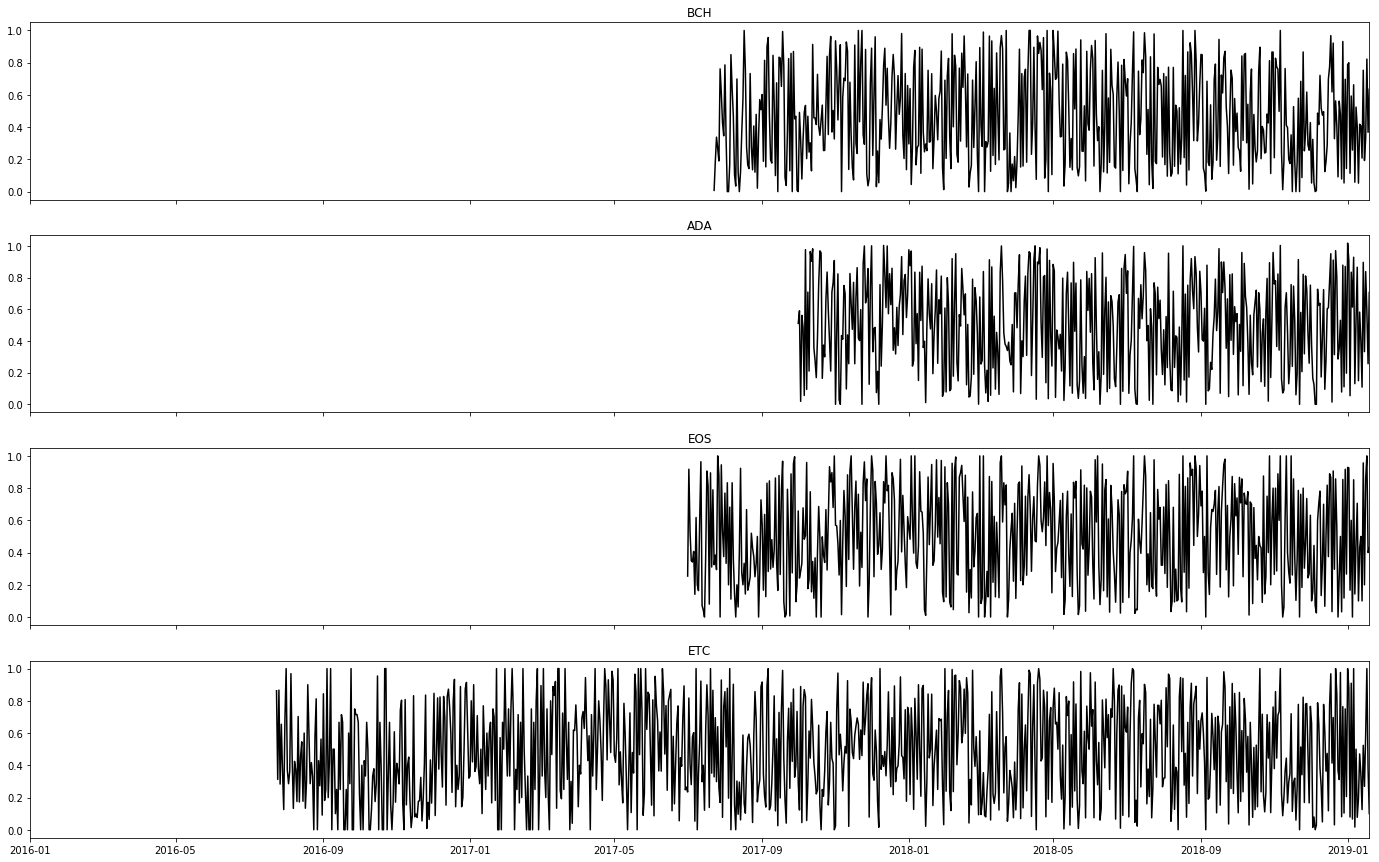

In [21]:
#let's look at the "close_ratio" - which appears to be both stationary AND ergodic, so there's a lot of...
#... different time-series clustering options that open up with this one, to see if there's correlation btwn coins

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=rawcoins['date_as_date'][(rawcoins['symbol'] == a)]
y1=rawcoins['close_ratio'][(rawcoins['symbol'] == a)]

x2=rawcoins['date_as_date'][(rawcoins['symbol'] == b)]
y2=rawcoins['close_ratio'][(rawcoins['symbol'] == b)]

x3=rawcoins['date_as_date'][(rawcoins['symbol'] == c)]
y3=rawcoins['close_ratio'][(rawcoins['symbol'] == c)]

x4=rawcoins['date_as_date'][(rawcoins['symbol'] == d)]
y4=rawcoins['close_ratio'][(rawcoins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
##plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#that was for slope of daily change of bitcoin ratio (DRG), but what about the raw ratio? see next cell

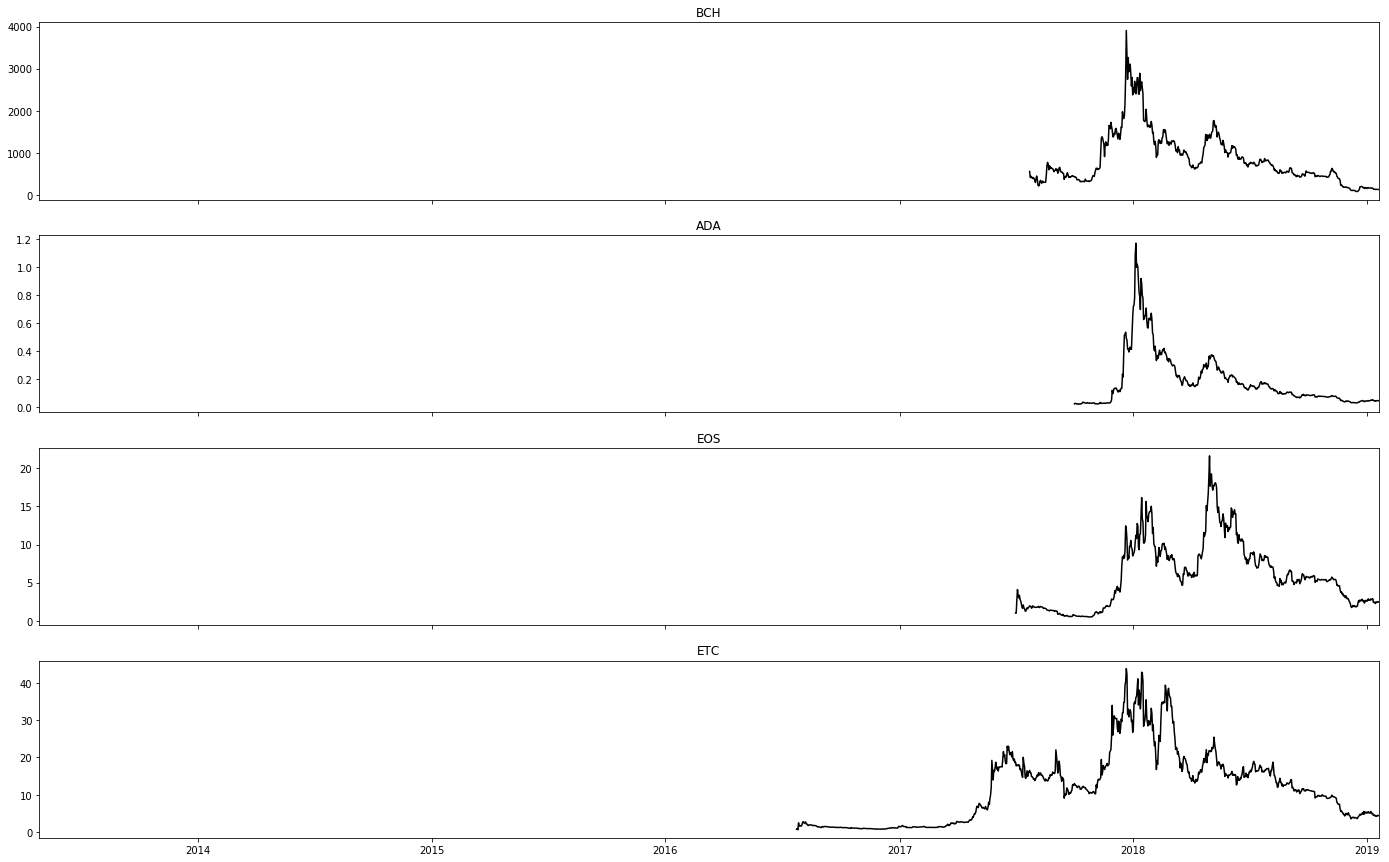

In [22]:
#same as above, but now plotting raw open values

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=rawcoins['date_as_date'][(rawcoins['symbol'] == a)]
y1=rawcoins['open'][(rawcoins['symbol'] == a)]

x2=rawcoins['date_as_date'][(rawcoins['symbol'] == b)]
y2=rawcoins['open'][(rawcoins['symbol'] == b)]

x3=rawcoins['date_as_date'][(rawcoins['symbol'] == c)]
y3=rawcoins['open'][(rawcoins['symbol'] == c)]

x4=rawcoins['date_as_date'][(rawcoins['symbol'] == d)]
y4=rawcoins['open'][(rawcoins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2013-04-28', '2019-01-19') 
plt.show()


## Data seems sufficiently clean to move on to some attempted clustering - but clustering options will be much more generous if I can acheive at least "stationarity" and maybe even "ergodicity" in the distributions of these time series first

## Shawn notes that stationarity requires not just a constant mean over time (coin_to_coin and close_ratio at least have that), but also constant variance over time, which coin_to_coin does not have

Let's visualize the distributions of these variables within the coins I've been playing with above:

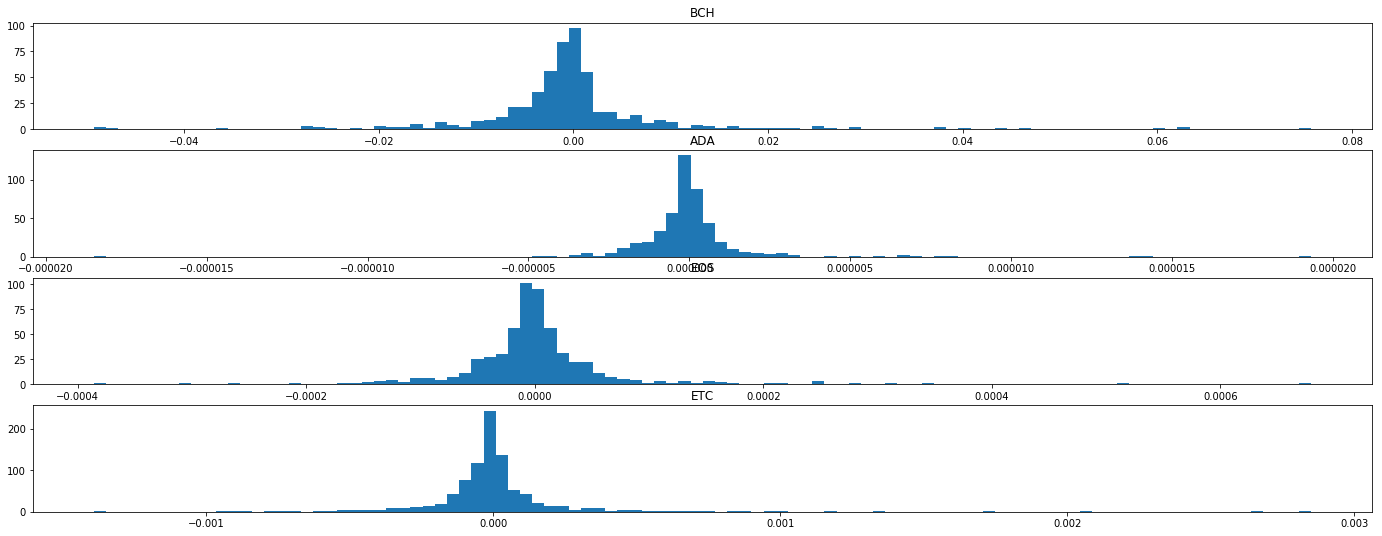

The distributions look fairly symmetric, but the tails are looooooong - guess that's the var blips


In [24]:
#same as above, but now plotting bitcoin_ratio

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

y1=rawcoins['open_to_open'][(rawcoins['symbol'] == a)]

y2=rawcoins['open_to_open'][(rawcoins['symbol'] == b)]

y3=rawcoins['open_to_open'][(rawcoins['symbol'] == c)]

y4=rawcoins['open_to_open'][(rawcoins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=False) #turned sharex off so that each could spread to fill its natural xlims
axarr[0].hist(y1, bins=100)
axarr[0].set_title(a) 
axarr[1].hist(y2, bins=100)
axarr[1].set_title(b) 
axarr[2].hist(y3, bins=100)
axarr[2].set_title(c)
axarr[3].hist(y4, bins=100)
axarr[3].set_title(d) 

# plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#bitcoin_ratio and open_to_open DRG have very similar correlations between stocks
print('The distributions look fairly symmetric, but the tails are looooooong - guess that\'s the var blips.')

In [ ]:
#same as above, but now trying some transformations

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

y1=rawcoins['open_to_open'][(rawcoins['symbol'] == a)]

y2=rawcoins['open_to_open'][(rawcoins['symbol'] == b)]

y3=rawcoins['open_to_open'][(rawcoins['symbol'] == c)]

y4=rawcoins['open_to_open'][(rawcoins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=False) #turned sharex off so that each could spread to fill its natural xlims
axarr[0].hist(y1, bins=100)
axarr[0].set_title(a) 
axarr[1].hist(y2, bins=100)
axarr[1].set_title(b) 
axarr[2].hist(y3, bins=100)
axarr[2].set_title(c)
axarr[3].hist(y4, bins=100)
axarr[3].set_title(d) 

# plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#bitcoin_ratio and open_to_open DRG have very similar correlations between stocks
print('The distributions look fairly symmetric, but the tails are looooooong - guess that\'s the var blips.')

In [14]:
#export as .csv - may come back later for further cleaning as necessary
rawcoins.to_csv('/home/cynthiaorourke/Documents/Data/cleaned_coins.csv', sep=',', encoding='utf-8')
coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/cleaned_coins.csv', header = 0)
list(coins)
print(coins.iloc[0:10,:])

   Unnamed: 0     slug symbol     name        date  ranknow    open    high  \
0           0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98   
1           1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49   
2           2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93   
3           3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89   
4           4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   
5           5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   
6           6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   
7           7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80   
8           8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66   
9           9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   

      low   close  volume      market  close_ratio  spread  bitcoin_open  \
0  132.10  134.21       0  1488566728     0.543814    

## CODE JUNKYARD BELOW
## Note: timelines are often not aligned - cannot compare directly between plots, except to say that there are definitely hot periods of upward and downward momentum

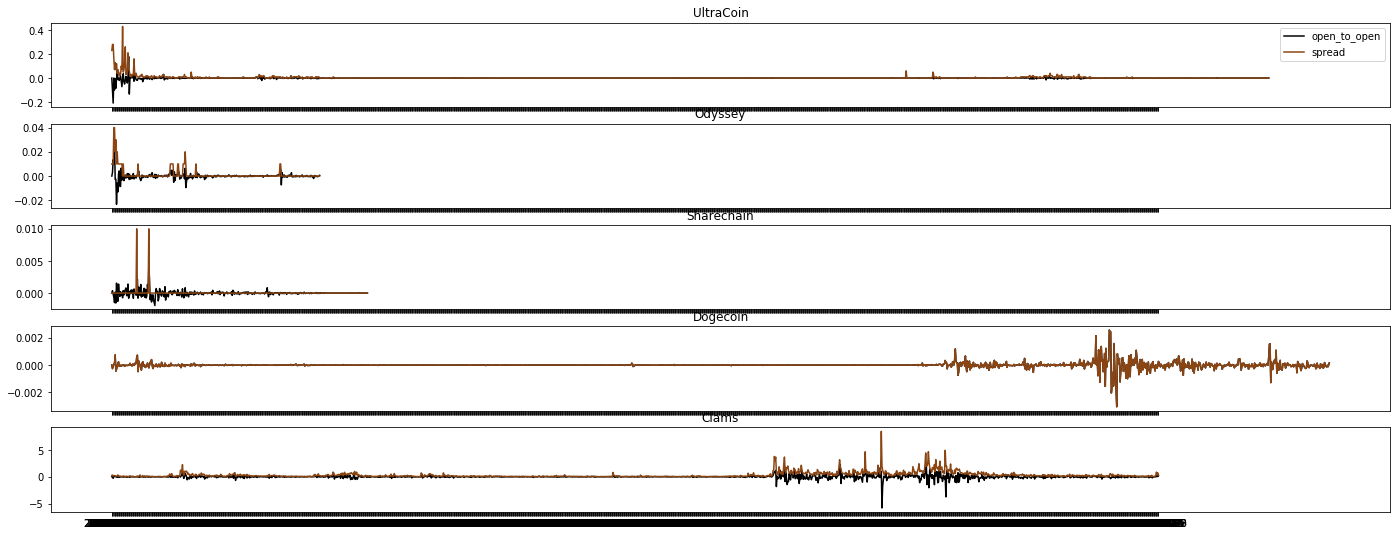

In [41]:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a=np.random.choice(rawcoins['name']) #manipulate coin1 name here
b=np.random.choice(rawcoins['name']) #manipulate coin2 name here
c=np.random.choice(rawcoins['name']) #manipulate coin3 name here
d=np.random.choice(rawcoins['name']) #manipulate coin4 name here
e=np.random.choice(rawcoins['name']) #manipulate coin5 name here

x1=rawcoins['date'][(rawcoins['name'] == a)]
y1=rawcoins['open_to_open'][(rawcoins['name'] == a)]
c1='black'
y2=rawcoins['spread'][(rawcoins['name'] == a)]
c2='saddlebrown'

x2=rawcoins['date'][(rawcoins['name'] == b)]
y3=rawcoins['open_to_open'][(rawcoins['name'] == b)]
c3='black'
y4=rawcoins['spread'][(rawcoins['name'] == b)]
c4='saddlebrown'

x3=rawcoins['date'][(rawcoins['name'] == c)]
y5=rawcoins['open_to_open'][(rawcoins['name'] == c)]
c5='black'
y6=rawcoins['spread'][(rawcoins['name'] == c)]
c6='saddlebrown'

x4=rawcoins['date'][(rawcoins['name'] == d)]
y7=rawcoins['open_to_open'][(rawcoins['name'] == d)]
c7='black'
y8=rawcoins['spread'][(rawcoins['name'] == d)]
c8='saddlebrown'

x5=rawcoins['date'][(rawcoins['name'] == e)]
y9=rawcoins['open_to_open'][(rawcoins['name'] == e)]
c9='black'
y10=rawcoins['spread'][(rawcoins['name'] == e)]
c10='saddlebrown'

f, axarr = plt.subplots(5, sharex=True)
axarr[0].plot(x1, y1, c=c1)
axarr[0].plot(x1, y2, c=c2)
axarr[0].legend(loc="upper right")
axarr[0].set_title(a) 
axarr[1].plot(x2, y3, c=c3)
axarr[1].plot(x2, y4, c=c4)
axarr[1].set_title(b) 
axarr[2].plot(x3, y5, c=c5)
axarr[2].plot(x3, y6, c=c6)
axarr[2].set_title(c) 
axarr[3].plot(x4, y7, c=c7)
axarr[3].plot(x4, y7, c=c8)
axarr[3].set_title(d) 
axarr[4].plot(x5, y9, c=c9)
axarr[4].plot(x5, y10, c=c10)
axarr[4].set_title(e) 

plt.show()

## Ok, let's go back to the ones that you put in your first demo and plot those
## Note that the first attempt still doesn't have aligned timelines!

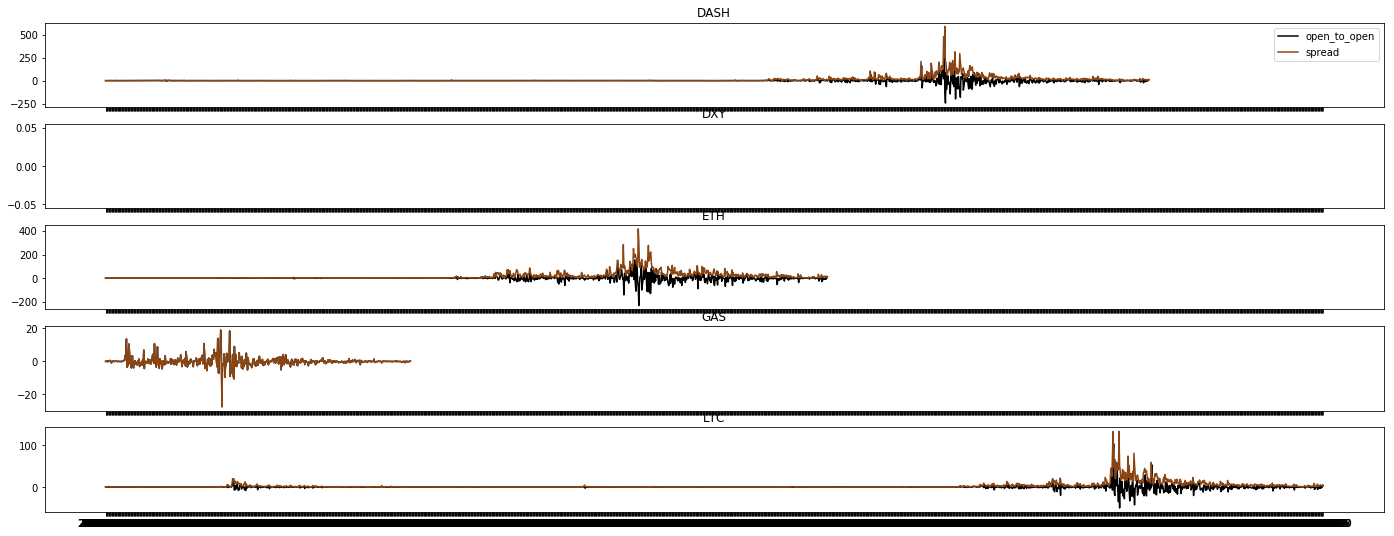

In [74]:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a=np.random.choice(rawcoins['symbol']) #manipulate coin1 symbol here
b=np.random.choice(rawcoins['symbol']) #manipulate coin2 symbol here
c=np.random.choice(rawcoins['symbol']) #manipulate coin3 symbol here
d=np.random.choice(rawcoins['symbol']) #manipulate coin4 symbol here
e=np.random.choice(rawcoins['symbol']) #manipulate coin5 symbol here

x1=rawcoins['date'][(rawcoins['symbol'] == 'DASH')]
y1=rawcoins['open_to_open'][(rawcoins['symbol'] == 'DASH')]
c1='black'
y2=rawcoins['spread'][(rawcoins['symbol'] == 'DASH')]
c2='saddlebrown'

x2=rawcoins['date'][(rawcoins['symbol'] == 'DXY')]
y3=rawcoins['open_to_open'][(rawcoins['symbol'] == 'DXY')]
c3='black'
y4=rawcoins['spread'][(rawcoins['symbol'] == 'DXY')]
c4='saddlebrown'

x3=rawcoins['date'][(rawcoins['symbol'] == 'ETH')]
y5=rawcoins['open_to_open'][(rawcoins['symbol'] == 'ETH')]
c5='black'
y6=rawcoins['spread'][(rawcoins['symbol'] == 'ETH')]
c6='saddlebrown'

x4=rawcoins['date'][(rawcoins['symbol'] == 'GAS')]
y7=rawcoins['open_to_open'][(rawcoins['symbol'] == 'GAS')]
c7='black'
y8=rawcoins['spread'][(rawcoins['symbol'] == 'GAS')]
c8='saddlebrown'

x5=rawcoins['date'][(rawcoins['symbol'] == 'LTC')]
y9=rawcoins['open_to_open'][(rawcoins['symbol'] == 'LTC')]
c9='black'
y10=rawcoins['spread'][(rawcoins['symbol'] == 'LTC')]
c10='saddlebrown'

f, axarr = plt.subplots(5, sharex=True)
axarr[0].plot(x1, y1, c=c1)
axarr[0].plot(x1, y2, c=c2)
axarr[0].legend(loc="upper right")
axarr[0].set_title('DASH') 
axarr[1].plot(x2, y3, c=c3)
axarr[1].plot(x2, y4, c=c4)
axarr[1].set_title('DXY') 
axarr[2].plot(x3, y5, c=c5)
axarr[2].plot(x3, y6, c=c6)
axarr[2].set_title('ETH') 
axarr[3].plot(x4, y7, c=c7)
axarr[3].plot(x4, y7, c=c8)
axarr[3].set_title('GAS') 
axarr[4].plot(x5, y9, c=c9)
axarr[4].plot(x5, y10, c=c10)
axarr[4].set_title('LTC') 

plt.show()

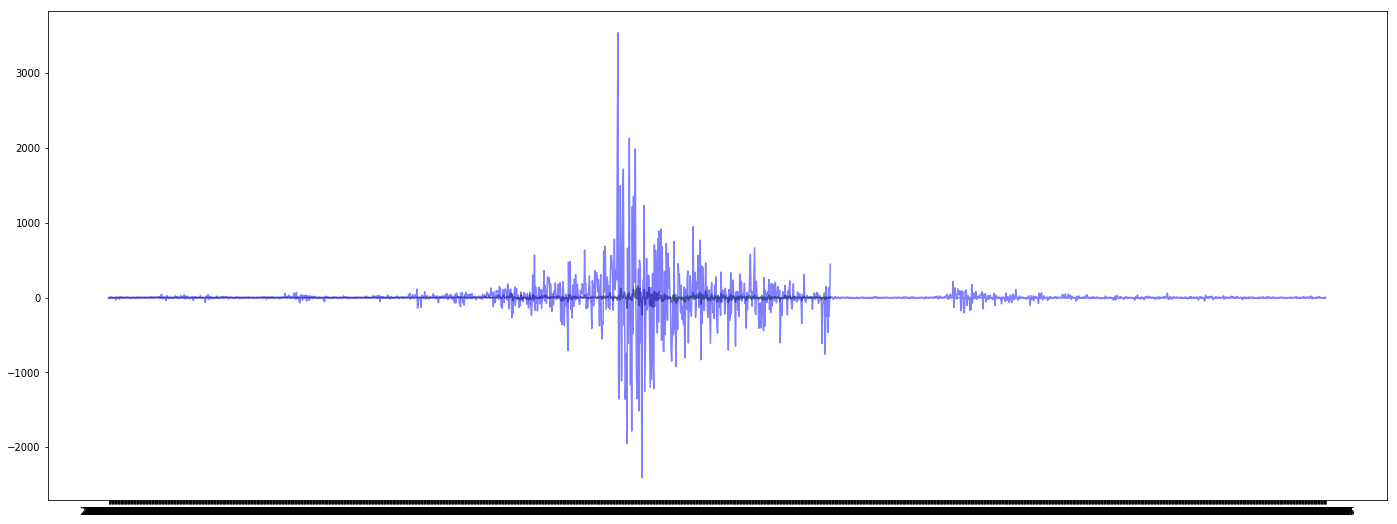

In [75]:
# subsetter = rawcoins['symbol']==('ETH' or 'BTC')
# subsetted = rawcoins[subsetter]
#subset = rawcoins.query('symbol==BTC or symbol==ETH')
#by_symbol = rawcoins.groupby('symbol')
#subset=by_symbol[by_symbol(['symbol'] == 'GAS'))]
#new_df = df[df.column_b | df.column_c == 1]


# plt.plot(bgds, bgd_costs, 'b--')
# plt.plot(sgds, sgd_costs, 'g-.')
# plt.plot(mgbds, mbgd_costs, 'r')
# plt.title("Blue-- = BGD, Green-. = SGD, Red=MBGD")
# plt.ylabel('Cost')
# plt.xlabel('Number of updates (k)')
# plt.show()

#plt.hold(True)
x1=rawcoins['date'][(rawcoins['symbol'] == 'ETH')]
y1=rawcoins['open_to_open'][(rawcoins['symbol'] == 'ETH')]
x2=rawcoins['date'][(rawcoins['symbol'] == 'BTC')]
y2=rawcoins['open_to_open'][(rawcoins['symbol'] == 'BTC')]
x3=rawcoins['date'][(rawcoins['symbol'] == 'BTCP')]
y3=rawcoins['open_to_open'][(rawcoins['symbol'] == 'BTCP')]
c1='black'
c2='blue'
c3='g'
plt.plot(x1, y1, c=c1, alpha=0.5)#coin a is in black
plt.plot(x2, y2, c=c2, alpha=0.5)#coin b is in blue
plt.plot(x3, y3, c=c3, alpha=0.5)#coin b is in green
plt.show()


# for name, group in subsetted:
#     plt.plot(group['open_to_open'], label=name)

# plt.show
# plt.legend()

## DRG needs to be normalized between coins before you can even visualize it
## Also, should be working with BTC ratio, not USD ratio - transform the USD ratio entries by date against BTC value such that (on given day) (USD/BTC)^-1(USD/coin)=BTC/coin

While working on this, using Jesse's R package crypto to scrape more up-to-date data from same source (coinmarketcap) for later use.

In [144]:
rawcoins['open_USD_per_btc']=1/(rawcoins['open'][rawcoins['symbol']=='BTC'])
print(rawcoins.iloc[0:5,[2,14]]) #works at the beginning of the df
print(rawcoins.iloc[-550:-545,[2,14]]) #works at the end of the df

      name  open_to_open
0  Bitcoin           NaN
1  Bitcoin         -0.86
2  Bitcoin          9.56
3  Bitcoin         -5.00
4  Bitcoin        -22.62
             name  open_to_open
941747      Bit20          0.00
941748      Bit20          0.02
941749      Bit20     -35122.93
941750  Project-X     380490.11
941751  Project-X         29.00


In [ ]:
#This is a total distaster - moving over to R to extract bitcoin ratios by day for each of these coins

library(dplyr)
bitcoin_only<-filter(all_coins,symbol=='BTC')
other_coins<-filter(all_coins,symbol!='BTC')
bitcoin_only<-bitcoin_only%>%rename(bitcoin_open=open)
skinny_bitcoin<-bitcoin_only%>%select(date,bitcoin_open)
rejoined<-left_join(other_coins,skinny_bitcoin)


# bitcoin_only=rawcoins[rawcoins['symbol']=='BTC']
# # grouped = rawcoins.groupby('date')
# # grouped.groups
# bitcoin_only.sort_index(inplace=True)
# rawcoins.sort_index(inplace=True)
# rawcoins['open_USD_per_btc'] = np.where(bitcoin_only['date'] == rawcoins['date'], bitcoin_only['open_USD_per_btc'])

# def get_ratio(x):
#     return grouped['open_USD_per_btc']*grouped['open']

# grouped.apply((lambda x: get_ratio(x)))    

#(lambda x: x / x.sum()) #need a function to replace lambda
# my_series.apply((lambda x: your_func(a,b,c,d,...,x)))



# bitcoin_only=rawcoins[rawcoins['symbol']=='BTC']
# rawcoins['date2']=rawcoins['date']
# print(rawcoins.iloc[0:10,15])
# # rawcoins['open_USD_per_btc'].update(rawcoins['date2']=bitcoin_only['date'], bitcoin_only['open_USD_per_btc'])
# # rawcoin['date2'].replace('world', 'Guido')

# #rawcoins.loc[rawcoins['date'] == bitcoin_only['date'], 'open_USD_per_btc'] = bitcoin_only['open_USD_per_btc']

# rawcoins["open_USD_per_btc"] = np.where(rawcoins['date']==bitcoin_only['date'], bitcoin_only['open_USD_per_btc'])

# bitcoin_only=rawcoins[rawcoins['symbol']=='BTC']
# subset_raw=rawcoins.iloc[0:5000,:]
# print(subset_raw.shape)

# subset_raw['open_USD_per_btc'][(subset_raw['date']=='2018-01-20')&(subset_raw['symbol']!='BTC')]=subset_raw['open_USD_per_btc'][(subset_raw['date']=='2018-01-20')&(subset_raw['symbol'=='BTC'])]

# rawcoins['open_USD_per_btc'] = np.where(bitcoin_only['date']==rawcoins['date'], rawcoins['open_USD_per_btc'])

# #for i in subset_raw['date']:
#     subset_raw['open_USD_per_btc']=bitcoin_only['open_USD_per_btc'][bitcoin_only['date']==i]
# #     if i == '2018-01-20':
#         print(i) 

# print(bitcoin_only.iloc[850:860,[1,3,5,14,15]])

# for i in rawcoins.iloc[10000:10100,3]:
#     rawcoins['btc_ratio']=rawcoins['open_USD_per_btc'][(rawcoins['date']==i)&(rawcoins['symbol']=='BTC')]*rawcoins['open'][rawcoins['date']==i]

# for i in rawcoins.iloc[10000:10100,3]:
#     print(rawcoins['open'][rawcoins['date']==i])
    
# for i in rawcoins['date]':
#    print(rawcoins['open_USD_per_btc'][(rawcoins['date']==i)&(rawcoins['symbol']=='LTC')])

# for i in rawcoins['date']:
#     if i%10000==0:
#         print(i)

# for i in rawcoins.iloc[1:10000,3]:
#     rawcoins['open_USD_per_btc2']=rawcoins['open_USD_per_btc'][(rawcoins['symbol']=='BTC')&(rawcoins['date']==i)]
   
    
 #rawcoins.where(s > 1, 10)
    
# print(rawcoins.iloc[0:10,[3,14]])
# print(rawcoins.iloc[10000:10010,[1,3,5,14,15]])



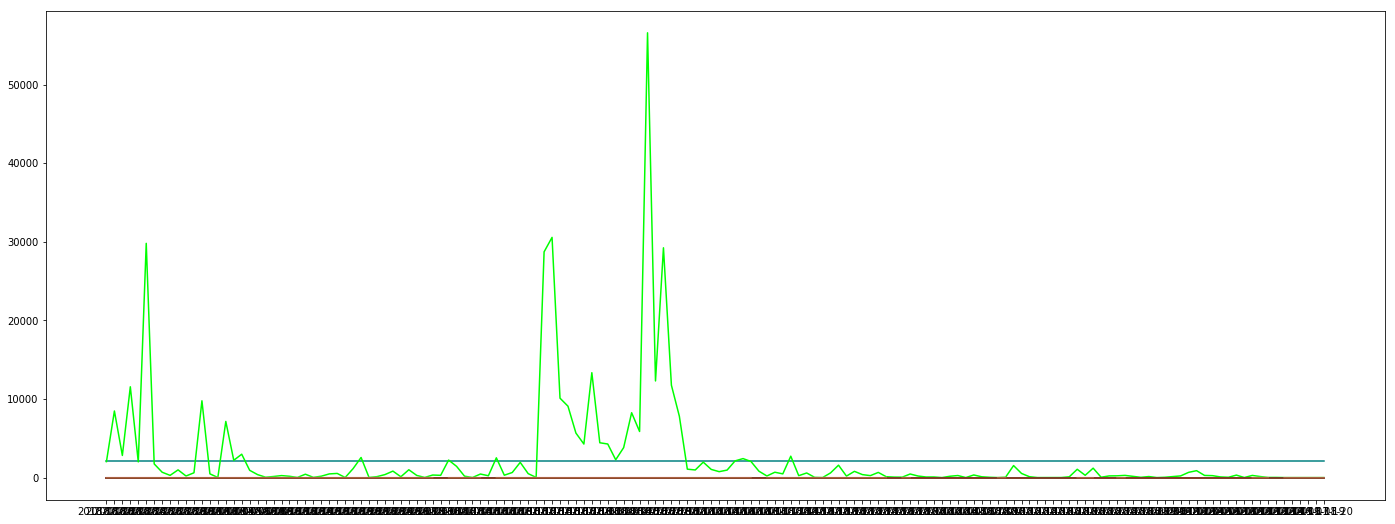

In [11]:
#what does this look like in comparison with the other processed metrics? 
#to save computational time, let's see if we can plot just within bitcoin
#went back and added matplotlib.pyplot as plt to the libraries initially imported
#print(plt.rcParams["figure.figsize"])
#plt.rcParams["figure.figsize"] = fig_size
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a="TWIST" #manipulate coin name here
x=rawcoins['date'][(rawcoins['name'] == a)]
y1=rawcoins['open_to_open'][(rawcoins['name'] == a)] #tiny! will be hidden if I include most of the rest of these
c1='black'
y2=rawcoins['open'][(rawcoins['name'] == a)]
c2='blue'
y3=rawcoins['high'][(rawcoins['name'] == a)]
c3='red'
y4=rawcoins['low'][(rawcoins['name'] == a)]
c4='grey'
y5=rawcoins['close'][(rawcoins['name'] == a)]
c5='orange'
y6=rawcoins['ranknow'][(rawcoins['name'] == a)]
c6='teal'
y7=rawcoins['volume'][(rawcoins['name'] == a)]
c7='lime'
y8=rawcoins['market'][(rawcoins['name'] == a)]
c8='indigo'
y9=rawcoins['close_ratio'][(rawcoins['name'] == a)]
c9='pink'
y10=rawcoins['spread'][(rawcoins['name'] == a)]
c10='saddlebrown'
plt.plot(x, y1, c=c1)#DRG is in black
plt.plot(x, y2, c=c2)
plt.plot(x, y3, c=c3)
plt.plot(x, y4, c=c4)
plt.plot(x, y5, c=c5)
plt.plot(x, y6, c=c6)#ranknow is showing up as 0 for newest coins - odd
plt.plot(x, y7, c=c7)
plt.plot(x, y8, c=c8)
plt.plot(x, y9, c=c9)
plt.plot(x, y10, c=c10)
plt.show()

BCH in blue
ADA in green


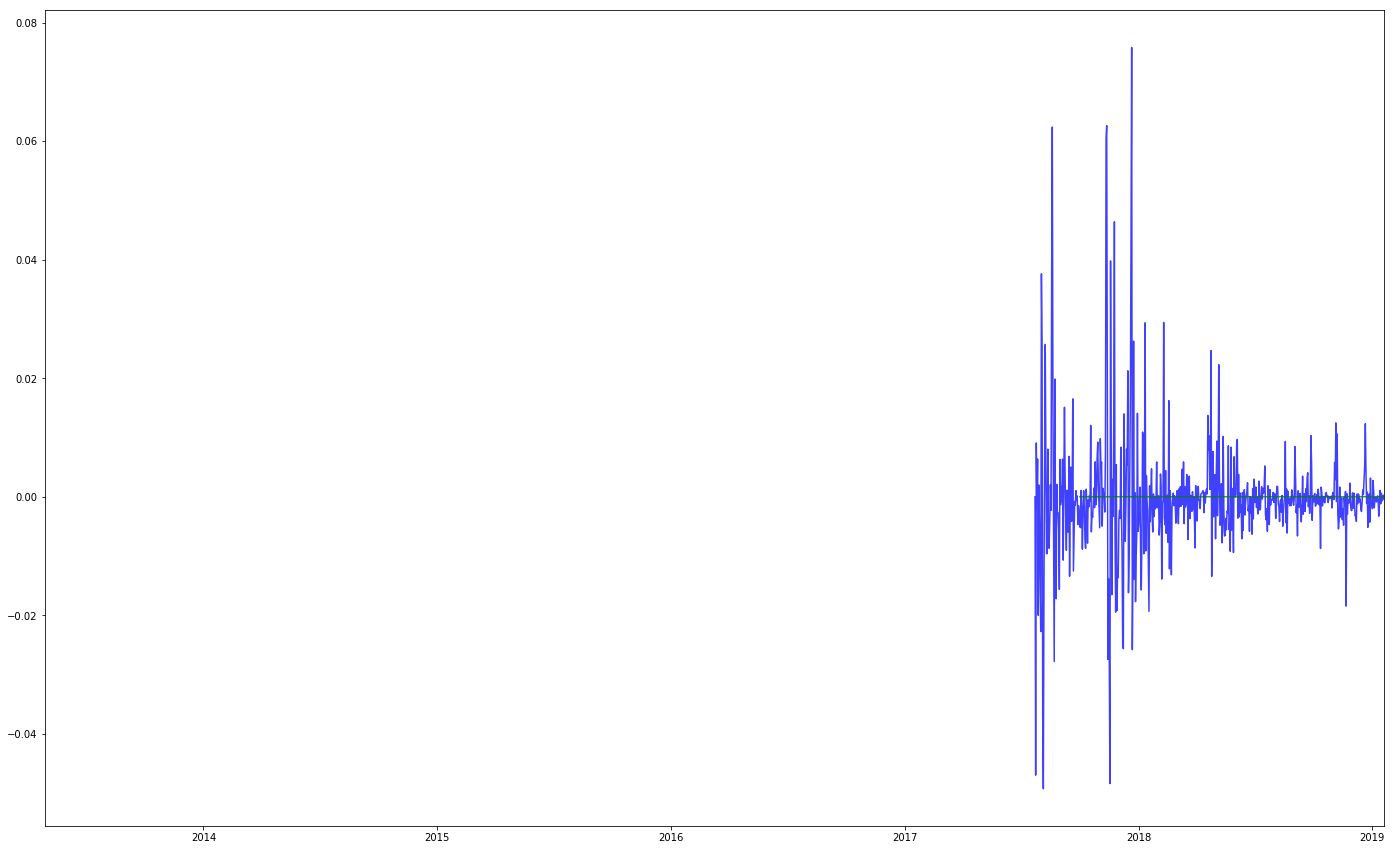

In [18]:
#for purposes of looked at between-coin correlations, can probably weed down to:

width = 24
length = 15
plt.rcParams['figure.figsize'] = (width, length)

# a=np.random.choice(rawcoins['symbol']) #specify a random coin
# b=np.random.choice(rawcoins['symbol']) #specify another random coin
a = 'BCH'
b = 'ADA'
print(a, 'in blue')
print(b, 'in green')
x2=rawcoins['date_as_date'][(rawcoins['symbol'] == a)]
y2=rawcoins['open_to_open'][(rawcoins['symbol'] == a)]
x3=rawcoins['date_as_date'][(rawcoins['symbol'] == b)]
y3=rawcoins['open_to_open'][(rawcoins['symbol'] == b)]
c2='blue'
c3='g'
plt.plot(x2, y2, c=c2, alpha=0.75)#coin a is in blue 
plt.plot(x3, y3, c=c3, alpha=0.75)#coin b is in green
plt.xlim('2013-04-28', '2019-01-19') 

plt.show()

#this is good, but the y-axes are too divergent to see the smaller-value coin against the bigger-value coin

In [16]:
# what exactly is market? assume it's market cap, which on coinmarketcap is circulating supply x price per coin
# let's check, though, by taking a couple of samples
# BTC market cap as of 20190121 on coinmarket cap = $62,597,711,526
# Kin market cap as of 20190121 on coinmarket cap = $22,669,223
# Wanchain market cap as of 20190121 on coinmarket cap = $33,178,053
print('Bitcoin')
print(rawcoins['market'][(rawcoins['name'] == 'Bitcoin')&(rawcoins['date']=='2019-01-19')])
print('Kin')
print(rawcoins['market'][(rawcoins['name'] == 'Kin')&(rawcoins['date']=='2019-01-19')])
print('Wanchain')
print(rawcoins['market'][(rawcoins['name'] == 'Wanchain')&(rawcoins['date']=='2019-01-19')])

#yes, market appears to be market cap

Bitcoin
2092    65214103659
Name: market, dtype: int64
Kin
86719    22297499
Name: market, dtype: int64
Wanchain
71633    36540742
Name: market, dtype: int64
